# Census Income Project

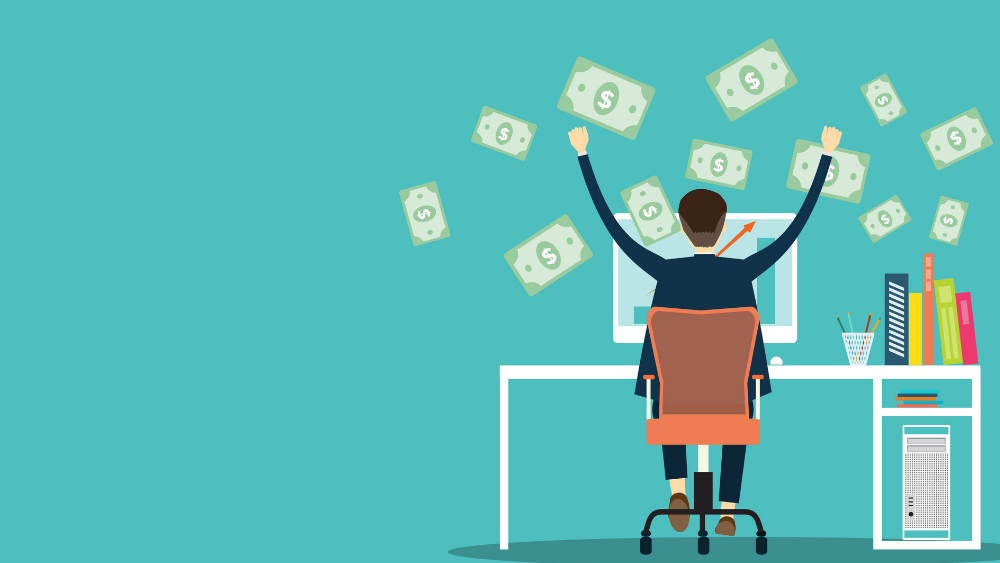

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). <b>The prediction task is to determine whether a person makes over $50K a year.</b>

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
7751,41,Private,163258,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K
23,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
478,23,Private,197904,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,35,United-States,<=50K


In [7]:
df.shape

(32560, 15)

<b>The dataset consists of 32560 rows and 15 columns.</b>

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<b>The dataset consists of 15 columns. Here, the column 'Income' is the target variable and the remaining columns are the features.</b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# Let's check the null values in the dataset

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

<AxesSubplot:>

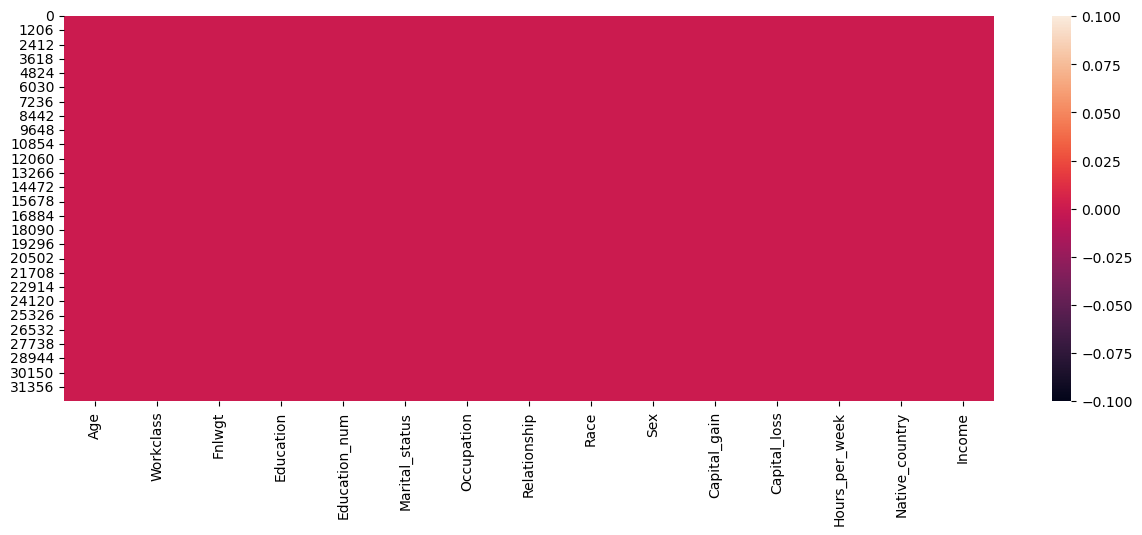

In [11]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b>We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [12]:
# Let's check the number of unique values present in the dataset

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [13]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<b>As we can see, some columns are of object datatype. So, we need to carry out encoding techniques.</b>

# Feature Engineering

In [14]:
# Let's check the value counts of each of the columns

for i in df.columns:
    print('___________________________________','\n')
    print(df[i].value_counts())

___________________________________ 

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
___________________________________ 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
___________________________________ 

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
___________________________________ 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th          

From the above analysis, we can conclude the following things:
* We have 29849, zero value in capital gain and 31041, zero values in capital loss, which is 90% of the data, so we can consider dropping them.
* Also we have ? value in workclass, occupation and Native_country, so we need to impute this value.

In [15]:
# Let's drop the columns 'capital_gain' and 'capital_loss'

df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [16]:
# Let's impute the null values by most occurring value as these are categorical columns

df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [17]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [20]:
# let's check duplicate values

df.duplicated().sum()

26

In [21]:
# let's drop duplicate data

df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


# Statistical Description of the Dataset

In [22]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


<b>This provides the statistical description of the data set. As there are no negative / invalid values present in the dataset, we can say that the dataset appears perfect.</b>

<AxesSubplot:>

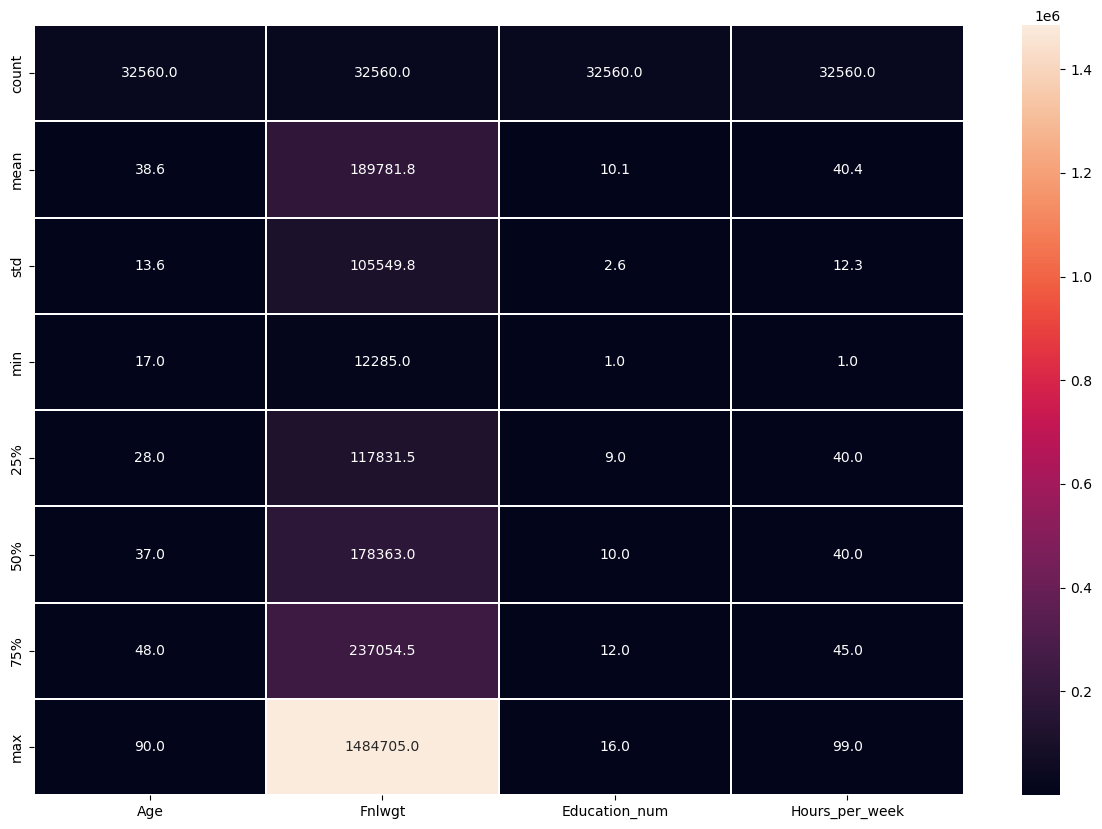

In [23]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,10))

sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True)

In [24]:
# Now, let's separate the categorical columns

categorical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [25]:
# Now, let's separate the numerical columns

numerical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization

# Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

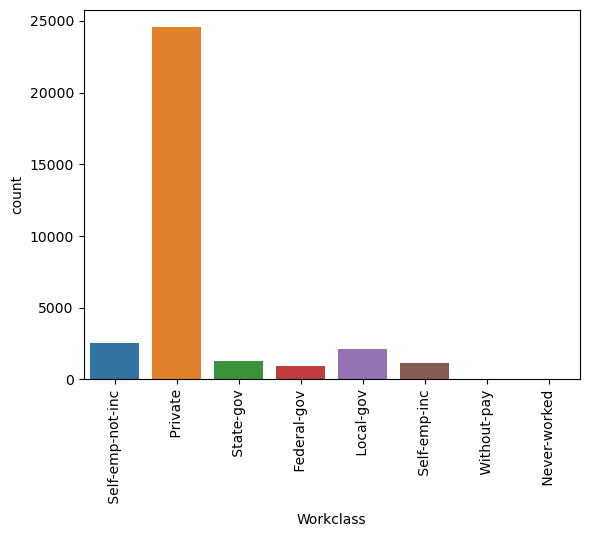

In [26]:
print(df['Workclass'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Workclass'])

<b>As we can see, majority of the population works in the Private sector.</b>

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

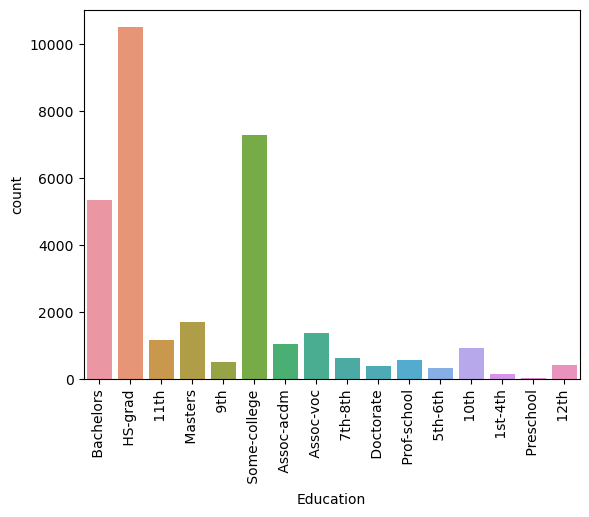

In [27]:
print(df['Education'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Education'])

<b>As we can see, majority of the people are High School Graduates.</b>

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

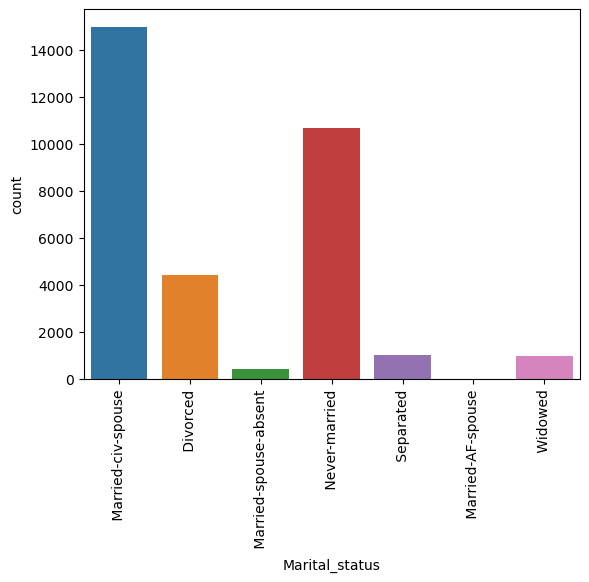

In [28]:
print(df['Marital_status'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Marital_status'])

<b>As we can see majority of the people are married.</b>

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

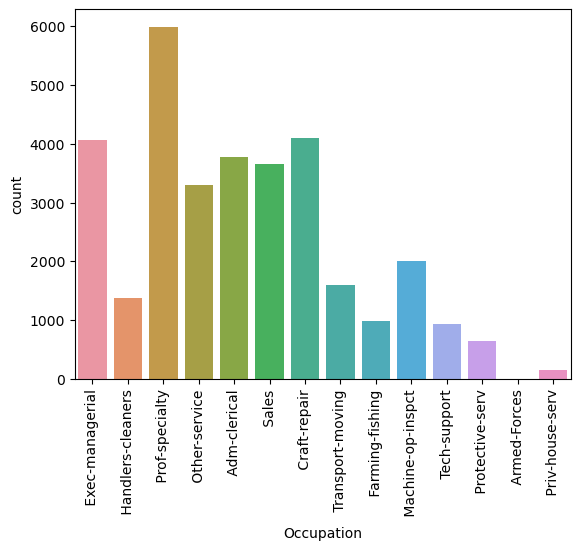

In [29]:
print(df['Occupation'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Occupation'])

<b>As we can see, majority of the population earning >50k are Professors, followed by Exec-managerial.</b>

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

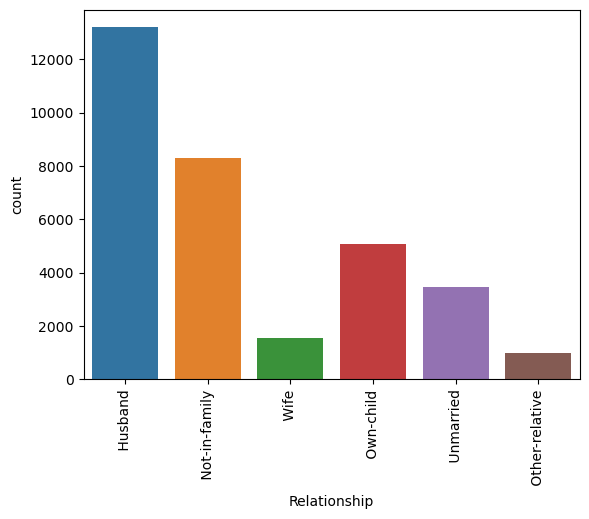

In [30]:
print(df['Relationship'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Relationship'])

<b>As we can see, majority of the population who earn either <=50K or >50K are husbands.</b>

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

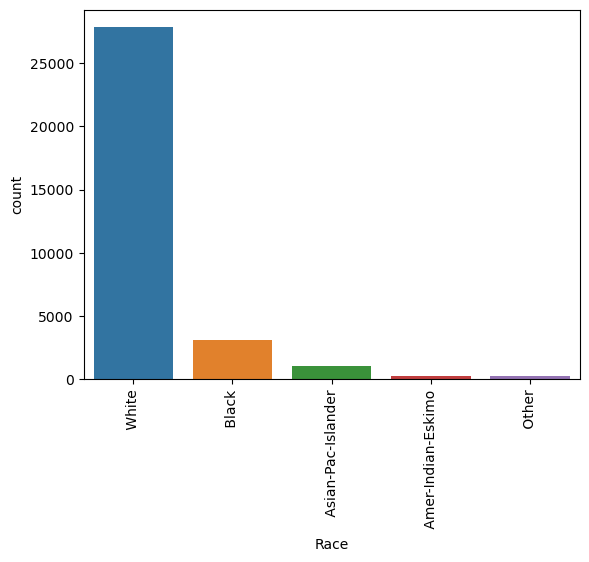

In [31]:
print(df['Race'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Race'])

<b>As we can see, majority of the population belong to the White Race.</b>

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

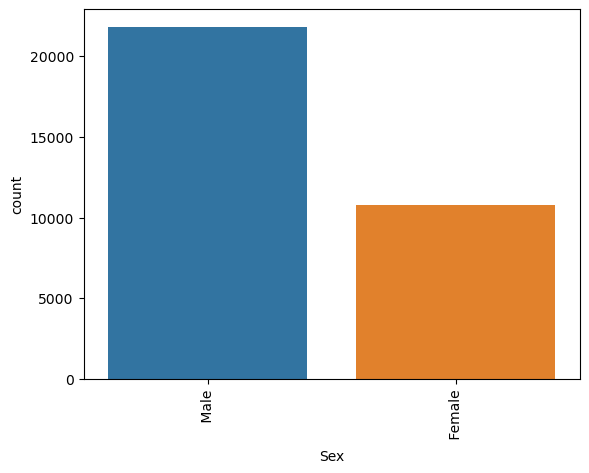

In [32]:
print(df['Sex'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Sex'])

<b>As we can see, majority of the population is Male.</b>

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

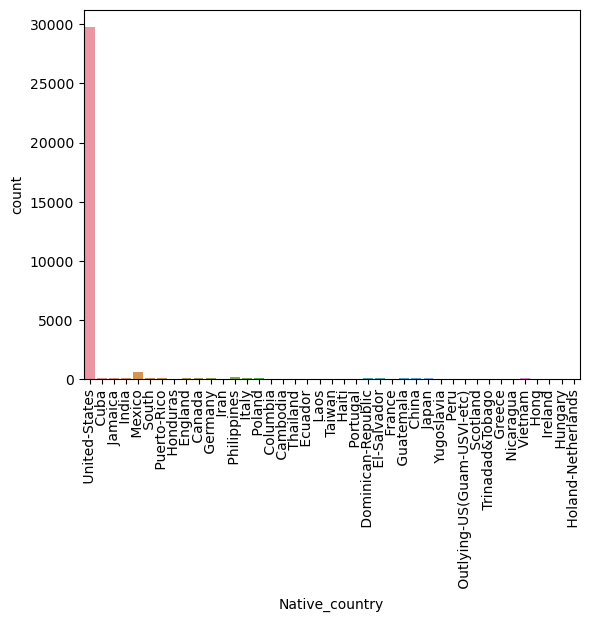

In [33]:
print(df['Native_country'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Native_country'])

<b>As we can see, majority of the population, i.e., around 90% of the population is from the United States.</b>

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

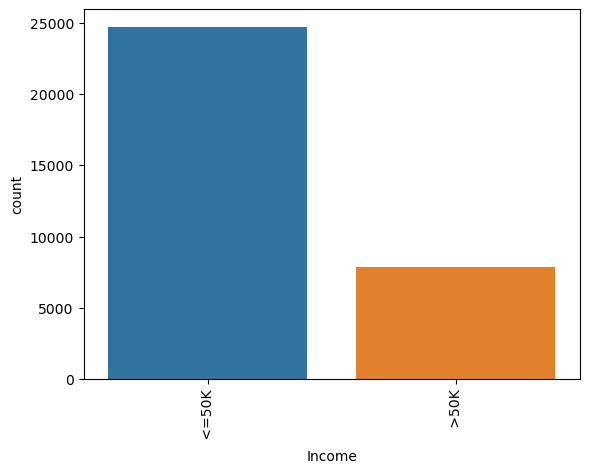

In [34]:
print(df['Income'].value_counts())
plt.xticks(rotation = 90)
sns.countplot(df['Income'])

<b>As we can see, majority of the population earns <=50k</b>

# Checking the distribution of data for numerical columns

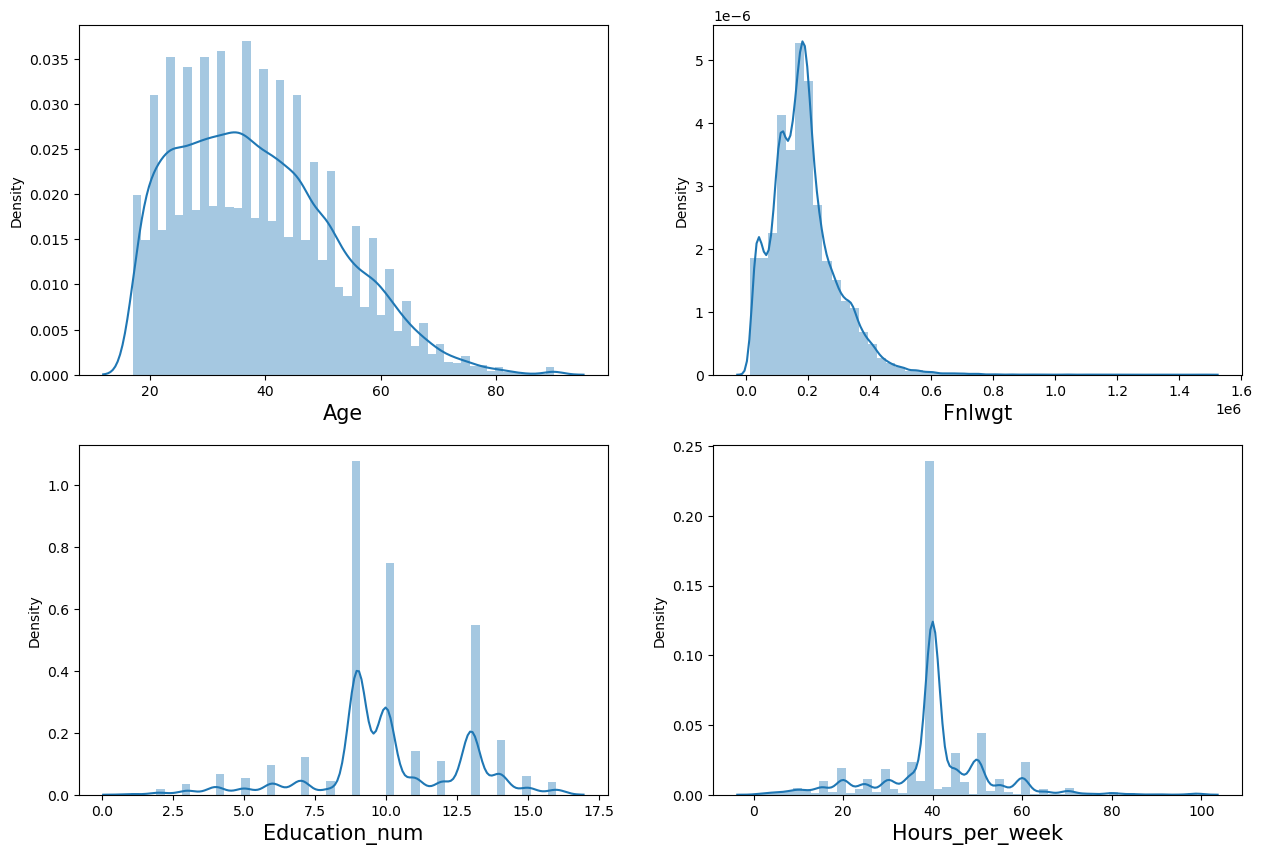

In [35]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()


<b>From the distribution plot above, we can observe the following things:</b>
 
* The above plot shows that the column 'Fnlwgt' is right-skewed.
* The columns 'Age', 'Education_num' and 'Hours_per_week' are normally distributed.
* Most of the population works for about 40 hours per week.

# Bivariate Analysis

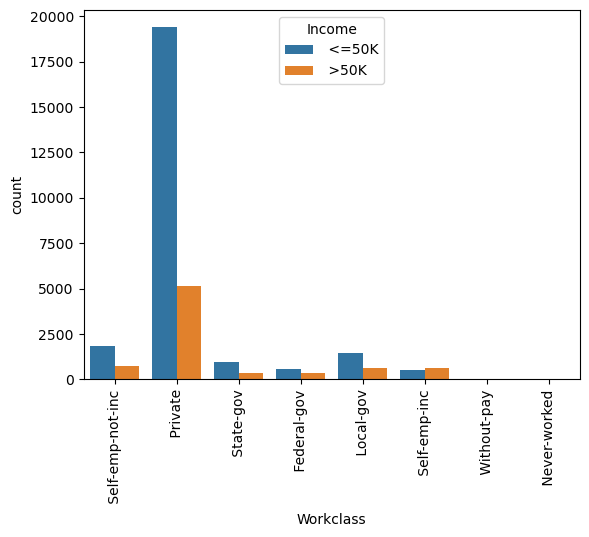

In [36]:
sns.countplot(df['Workclass'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people who work in the Private sector are more likely to have their Income >50K</b>

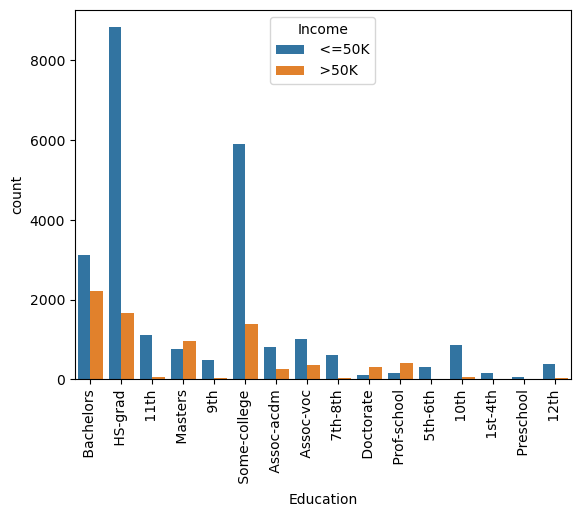

In [37]:
sns.countplot(df['Education'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people who are Graduates are more likely to have their Income >50K, followed by people who are High School Graduates.</b>

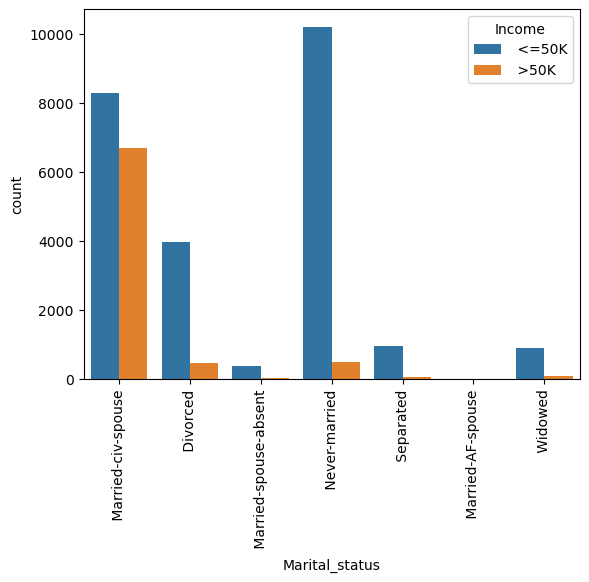

In [38]:
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people who are Never-married are more likely to have their Income <=50K. Also, people who are married are more likely to have their Income >50K</b>

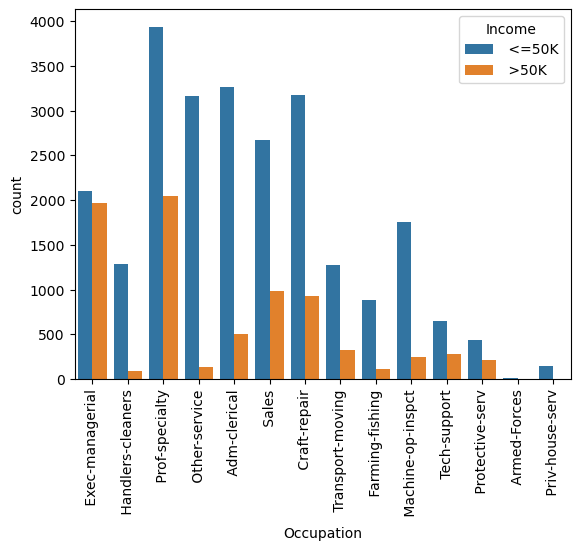

In [39]:
sns.countplot(df['Occupation'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, majority of the population earning >50k are Professors, followed by Exec-managerial.</b>

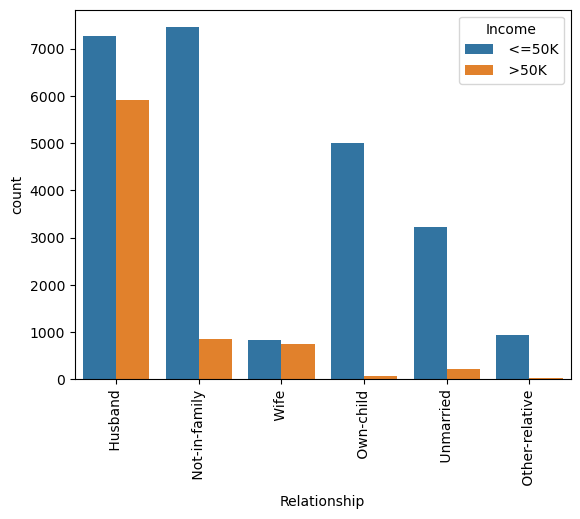

In [40]:
sns.countplot(df['Relationship'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, majority of the husbands earn >50K.</b>

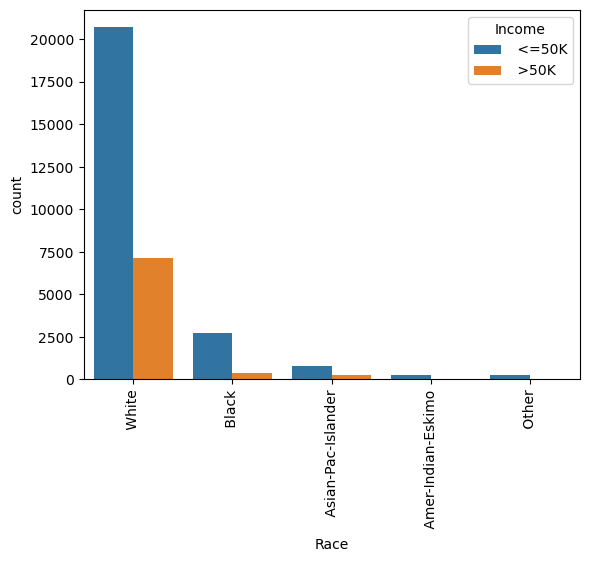

In [41]:
sns.countplot(df['Race'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people belonging to the White Race are more likely to have their Income >50K</b>

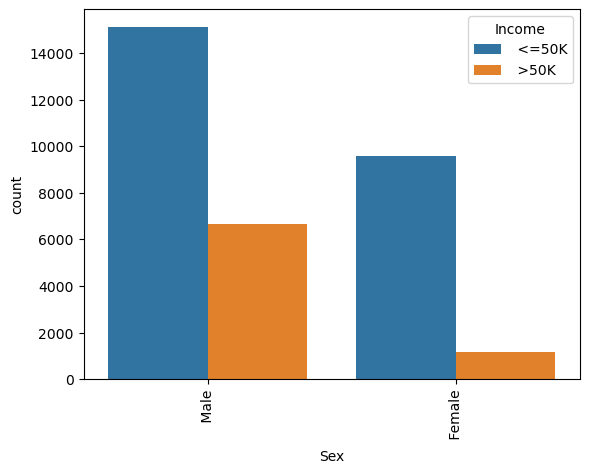

In [42]:
sns.countplot(df['Sex'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, Males are more likely to have their Income >50K</b>

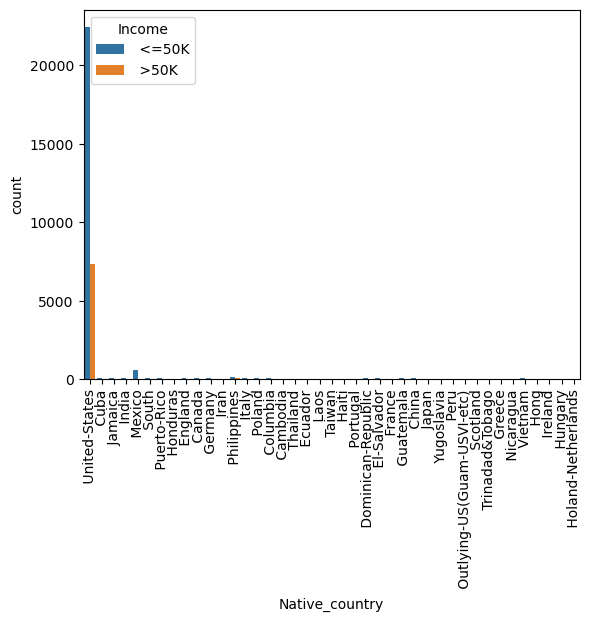

In [43]:
sns.countplot(df['Native_country'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, majority of the population, i.e., around 90% of the population is from the United States.</b>

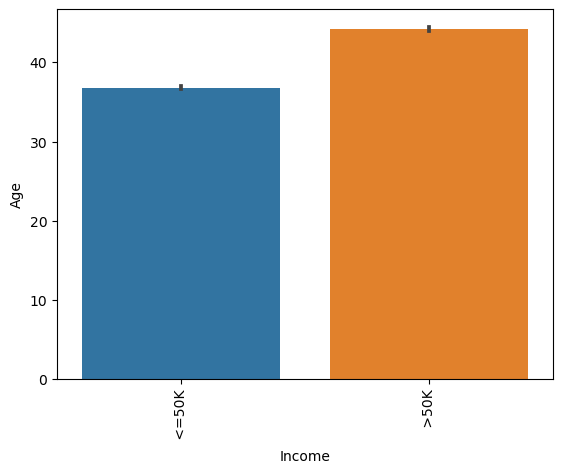

In [44]:
sns.barplot(df['Income'], df['Age'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people who are more than 40 years of age are more likely to have their Income >50K</b>

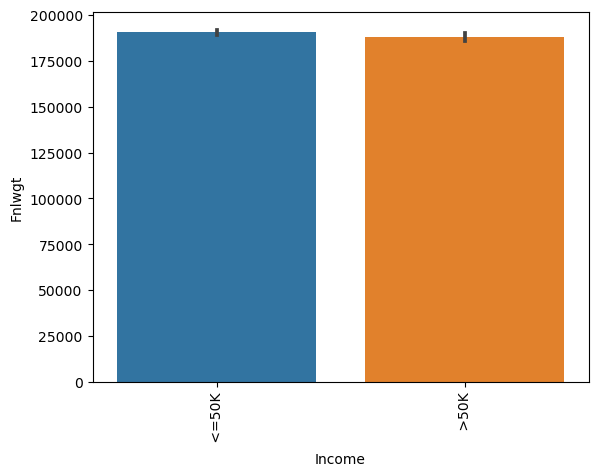

In [45]:
sns.barplot(df['Income'], df['Fnlwgt'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, Fnlwgt has no significant impact on Income.</b>

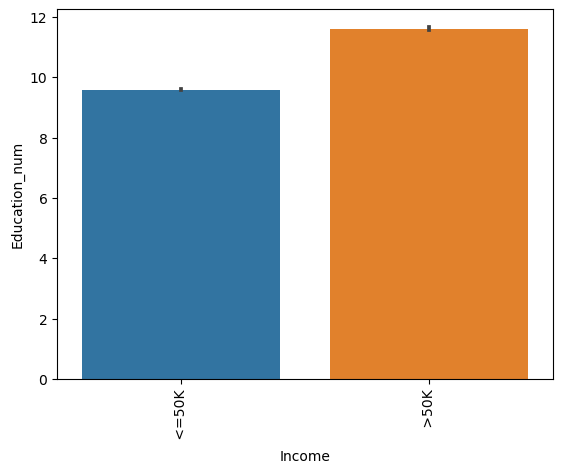

In [46]:
sns.barplot(df['Income'], df['Education_num'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people with Education_num greater than 10 are more than to have their Income >50K</b>

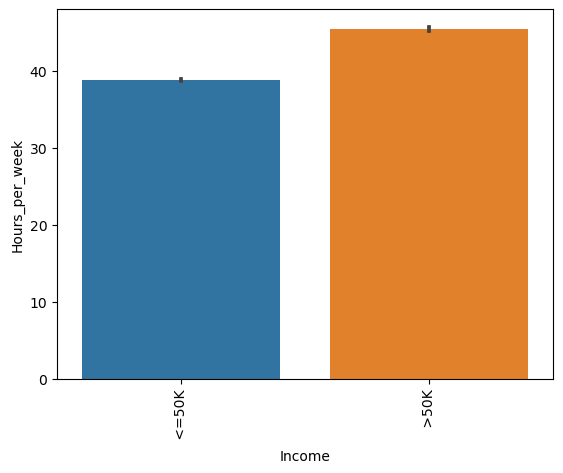

In [47]:
sns.barplot(df['Income'], df['Hours_per_week'])
plt.xticks(rotation = 90)
plt.show()

<b>As we can see, people who work more than 40 hours per week are more likely to have their Income >50K</b>

# Multivariate Analysis

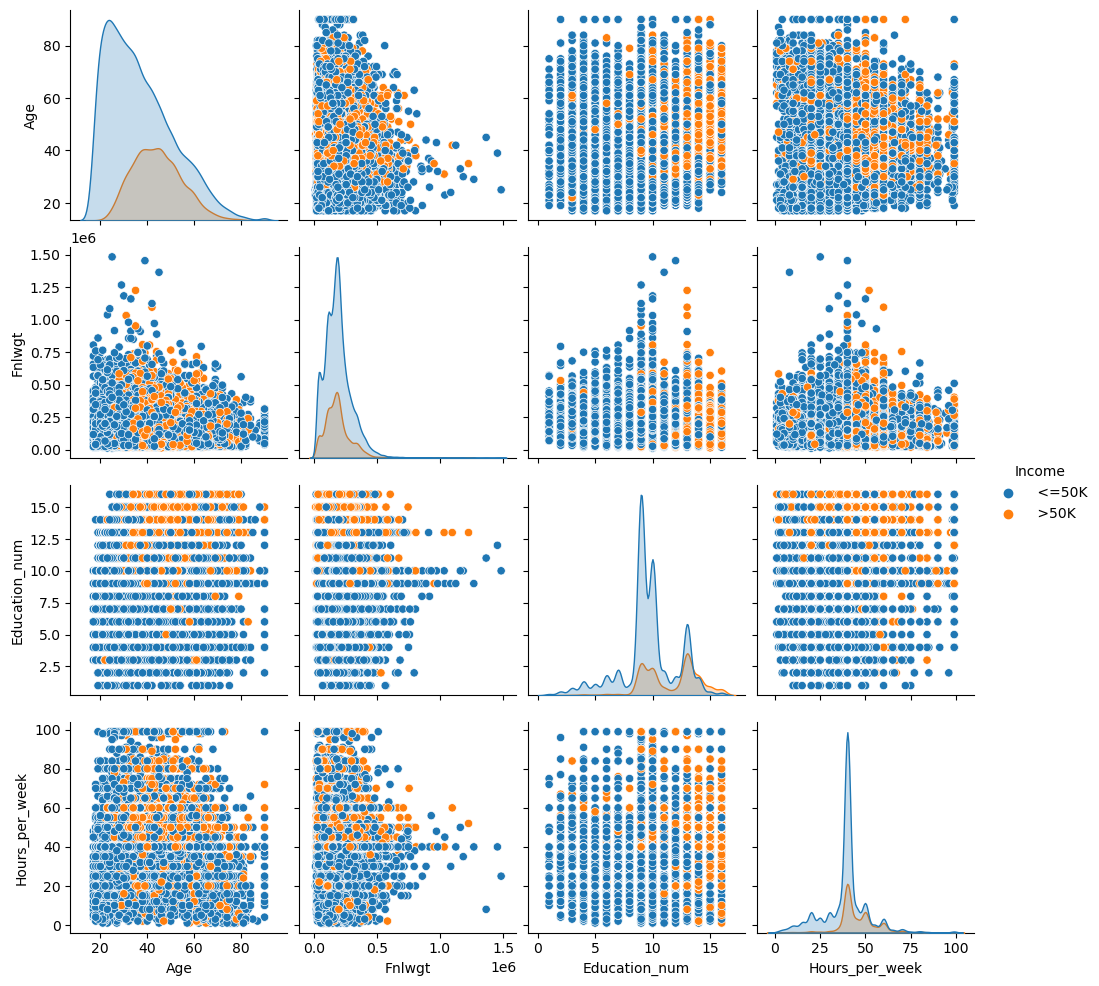

In [48]:
sns.pairplot(df, hue='Income')
plt.show()

# Outliers Detection

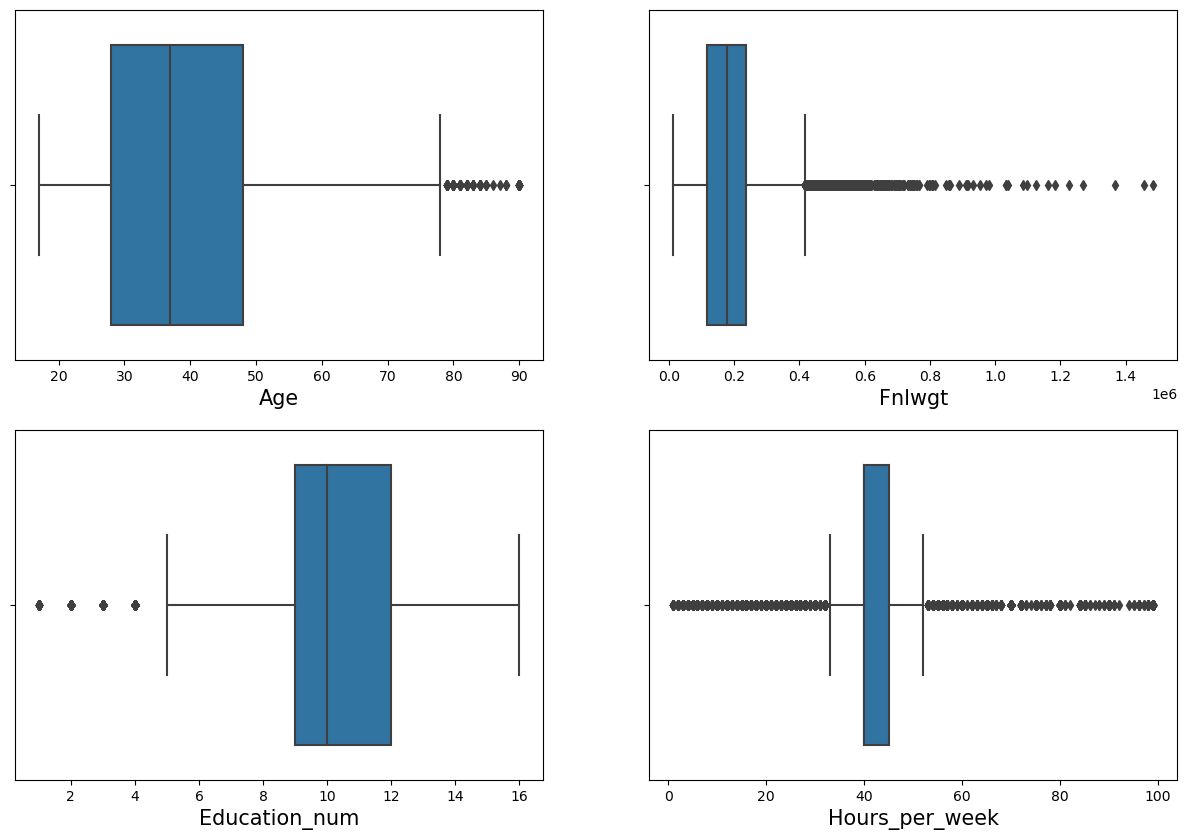

In [49]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()


<b>As we can see, outliers are present in the columns 'Age', 'Fnlwgt', 'Education_num' and 'Hours_per_week'.</b>

In [50]:
features = df[['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']]
from scipy.stats import zscore

z = np.abs(zscore(features))
z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [51]:
# Now, let's create a new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [52]:
print(df.shape) 
print(df_new.shape) 

(32560, 13)
(31461, 13)


# Percentage data loss

In [53]:
loss_percent = (32560-31461)/32560*100
print(loss_percent, '%')

3.3753071253071254 %


<b>As the data loss is just 3.37%, we can proceed further.</b>

In [54]:
df_new.shape

(31461, 13)

# Checking for Skewness

In [55]:
df_new.skew().sort_values()

Hours_per_week   -0.341724
Education_num    -0.159752
Age               0.472279
Fnlwgt            0.634828
dtype: float64

<b>The column 'Fnlwgt' does not lie in the range +/-0.5, thus skewness is present in this column.</b>

# Removing Skewness using yeo-johnson method

In [56]:
skewed_features = ['Fnlwgt']

In [57]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [58]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()

,Fnlwgt
0,-1.114171
1,0.427192
2,0.607320
3,1.487719
4,1.048962


In [59]:
# Now, let's check the skewness again after applying yeo-johnson method

df_new.skew()

Age               0.472279
Fnlwgt           -0.034507
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

<b>We can see that the skewness has been removed.</b>

<b>Now, let's visualize the data using distplot</b>

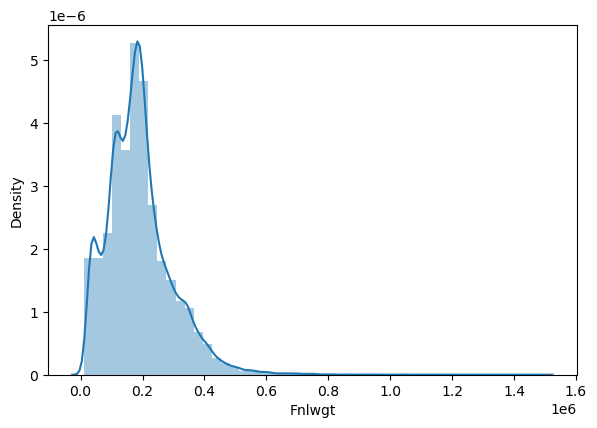

In [60]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df_new[skewed_features]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# Encoding the categorical columns using Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df_new[categorical_columns] = df_new[categorical_columns].apply(LE.fit_transform)
df_new[categorical_columns]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,0,38,0
32556,3,10,2,6,0,4,1,38,1
32557,3,10,6,0,4,4,0,38,0
32558,3,10,4,0,3,4,1,38,0


# Correlation between features and labels

In [62]:
df_new.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


# Correlation between features and labels using Heatmap

<AxesSubplot:>

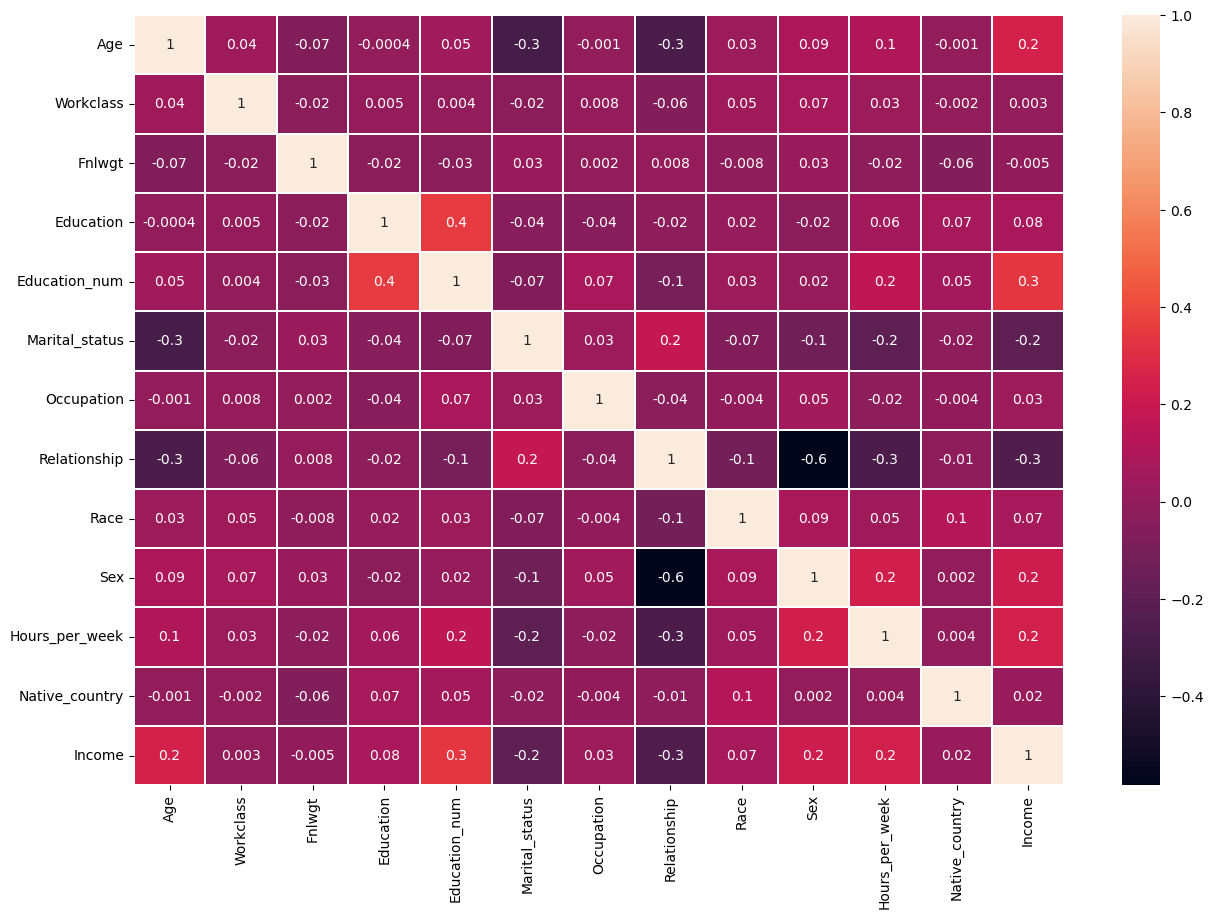

In [63]:
plt.figure(figsize=(15,10))

sns.heatmap(df_new.corr(), linewidths=0.1, fmt='.1g', annot = True)

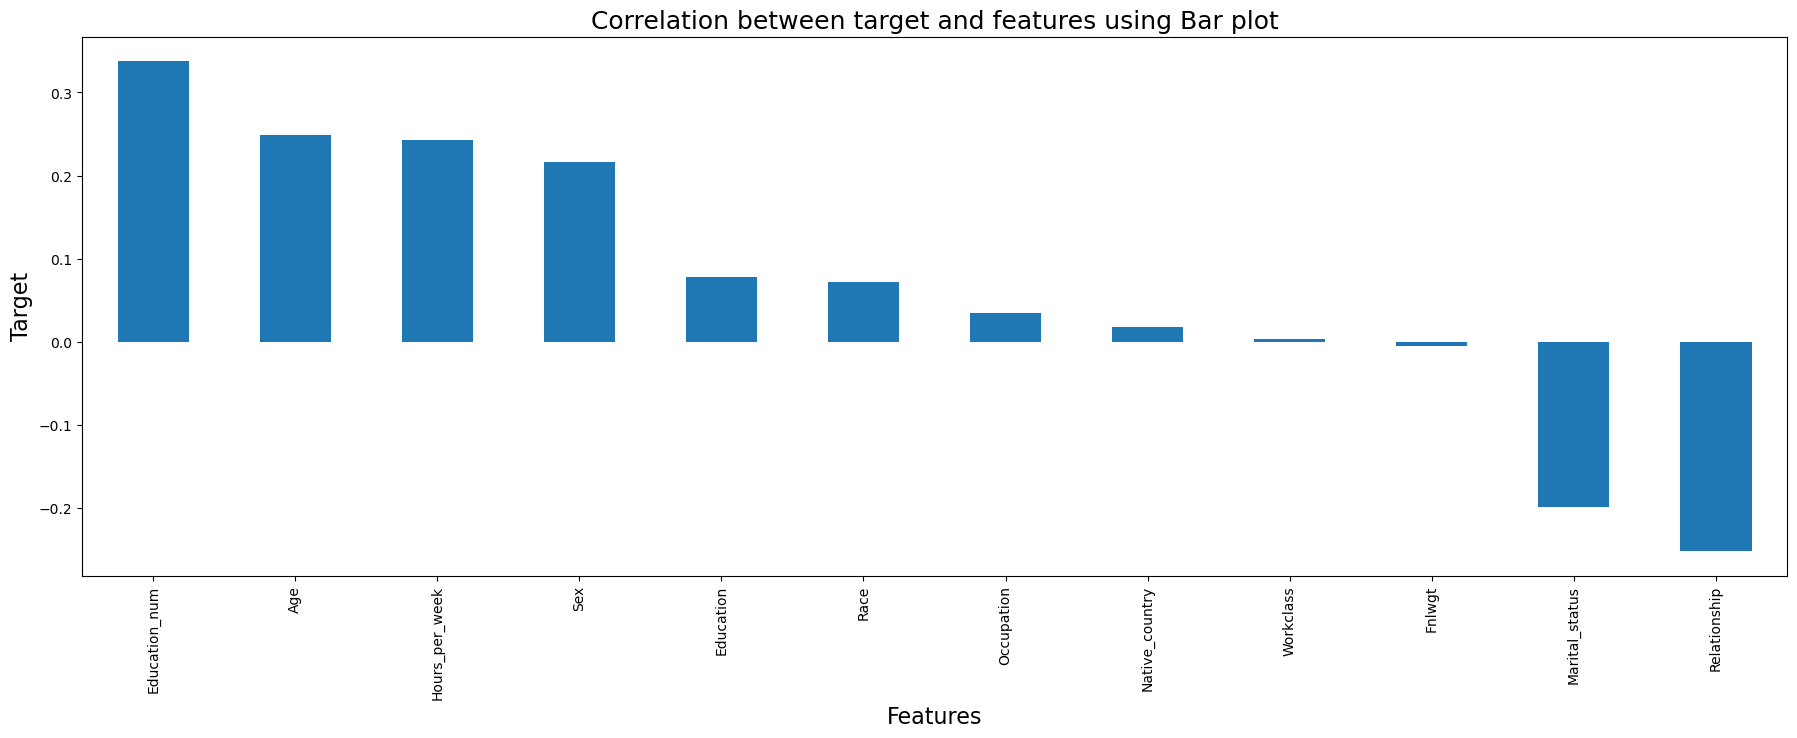

In [64]:
plt.figure(figsize=(22,7))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

<b>Let's drop the columns 'Workclass' and 'Fnlwgt' as they have very low correlation with the target variable.</b>

In [65]:
df_new.drop('Workclass',axis=1, inplace=True)
df_new.drop('Fnlwgt',axis = 1, inplace=True)
df_new.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,8,13,2,3,0,4,1,13,38,0
1,38,10,9,0,5,1,4,1,40,38,0
2,53,1,7,2,5,0,2,1,40,38,0
3,28,8,13,2,9,5,2,0,40,4,0
4,37,11,14,2,3,5,4,0,40,38,0


In [66]:
df_new.shape

(31461, 11)

<b>By checking out the shape of the dataset, we can confirm that the columns 'BusinessTravel' and 'HourlyRate' have been deleted.</b>

# Seperating dependent and independent variables

In [67]:
x = df_new.drop('Income', axis=1)

y = df_new['Income']

In [68]:
x.shape

(31461, 10)

In [69]:
y.shape

(31461,)

# Balancing the dataset using SMOTE

In [70]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [72]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

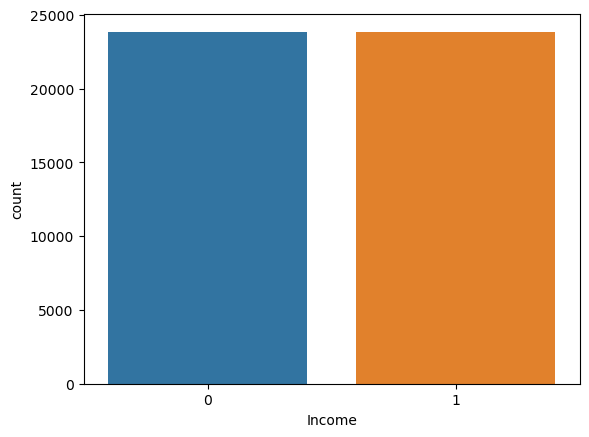

In [73]:
sns.countplot(y)

# Data Standardization using Standard Scaler

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.776068,-0.425519,0.953409,-0.304520,-0.798603,-0.716862,0.367902,0.622388,-2.634490,0.243763
1,-0.174640,0.225909,-0.648667,-1.830352,-0.291753,-0.098509,0.367902,0.622388,-0.155754,0.243763
2,1.013745,-2.705516,-1.449704,-0.304520,-0.291753,-0.716862,-2.153811,0.622388,-0.155754,0.243763
3,-0.966897,-0.425519,0.953409,-0.304520,0.721947,2.374901,-2.153811,-1.606715,-0.155754,-5.541526
4,-0.253866,0.551623,1.353928,-0.304520,-0.798603,2.374901,0.367902,-1.606715,-0.155754,0.243763
...,...,...,...,...,...,...,...,...,...,...
47701,0.459165,0.225909,-0.648667,-0.304520,1.482222,-0.716862,0.367902,0.622388,0.211466,0.243763
47702,-0.649994,0.225909,-0.648667,-0.304520,-1.052028,-0.716862,0.367902,0.622388,0.670491,0.243763
47703,0.696842,-3.031230,-1.850223,-0.304520,-1.052028,-0.716862,0.367902,0.622388,-0.155754,0.243763
47704,-0.808445,0.225909,-0.648667,-0.304520,1.482222,-0.716862,0.367902,0.622388,-0.155754,0.243763


<b>The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


,VIF values,Features
0,1.158479,Age
1,1.087825,Education
2,1.150065,Education_num
3,1.141635,Marital_status
4,1.019739,Occupation
5,1.938148,Relationship
6,1.042713,Race
7,1.774027,Sex
8,1.161493,Hours_per_week
9,1.030025,Native_country


<b>As none of the columns have vif greater than 10, there is no multicollinearity problem.</b>

# Finding best random state

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [77]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, " on Random_state ", maxRS)

Best accuracy is  0.7576159865846842  on Random_state  109


# Train Test Split

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=109)

# LogisticRegression

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [82]:
LR.fit(xtrain, ytrain)

predlr = LR.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,predlr)}")

Accuracy Score: 75.76159865846842%
roc_auc_score: 75.74518173952633%
---------------------------------------------------
Confusion Matrix : 
 [[5210 1898]
 [1571 5633]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      7108
           1       0.75      0.78      0.76      7204

    accuracy                           0.76     14312
   macro avg       0.76      0.76      0.76     14312
weighted avg       0.76      0.76      0.76     14312



# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_dt)}")

Accuracy Score: 82.62996087199554%
roc_auc_score: 82.61755568172124%
---------------------------------------------------
Confusion Matrix : 
 [[5741 1367]
 [1119 6085]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      7108
           1       0.82      0.84      0.83      7204

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



# RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred_rfc = rfc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_rfc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_rfc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_rfc)}")

Accuracy Score: 85.88596981553941%
roc_auc_score: 85.87024278702165%
---------------------------------------------------
Confusion Matrix : 
 [[5937 1171]
 [ 849 6355]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      7108
           1       0.84      0.88      0.86      7204

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



# KNeighborsClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pred_knc = knc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_knc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_knc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_knc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_knc)}")

Accuracy Score: 83.39155953046394%
roc_auc_score: 83.36948662610686%
---------------------------------------------------
Confusion Matrix : 
 [[5692 1416]
 [ 961 6243]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      7108
           1       0.82      0.87      0.84      7204

    accuracy                           0.83     14312
   macro avg       0.84      0.83      0.83     14312
weighted avg       0.84      0.83      0.83     14312



# Support Vector Machine Classifier

In [86]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_svc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_svc)}")

Accuracy Score: 82.57406372275014%
roc_auc_score: 82.53381554735584%
---------------------------------------------------
Confusion Matrix : 
 [[5440 1668]
 [ 826 6378]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.77      0.81      7108
           1       0.79      0.89      0.84      7204

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.82     14312
weighted avg       0.83      0.83      0.83     14312



# XGB Classifier Model

In [87]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
pred_xgb = xgb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_xgb)}")

Accuracy Score: 84.95667970933482%
roc_auc_score: 84.93242749213607%
--------------------------------------------------------
Confusion Matrix : 
 [[5780 1328]
 [ 825 6379]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7108
           1       0.83      0.89      0.86      7204

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



# Cross-Validation

In [88]:
from sklearn.model_selection import cross_val_score


print("Cross validation score of LogisticRegression() is:", cross_val_score(LR,x,y,cv=5).mean())
print("Cross validation score of DecisionTreeClassifier() is:", cross_val_score(dt,x,y,cv=5).mean())
print("Cross validation score of RandomForestClassifier() is:", cross_val_score(rfc,x,y,cv=5).mean())
print("Cross validation score of KNeighborsClassifier() is:", cross_val_score(knc,x,y,cv=5).mean())
print("Cross validation score of SVC() is:", cross_val_score(svc,x,y,cv=5).mean())
print("Cross validation score of XGBClassifier() is:", cross_val_score(xgb,x,y,cv=5).mean())

Cross validation score of LogisticRegression() is: 0.7479563966792613
Cross validation score of DecisionTreeClassifier() is: 0.8337116115556045
Cross validation score of RandomForestClassifier() is: 0.8607522376208616
Cross validation score of KNeighborsClassifier() is: 0.8264797047617041
Cross validation score of SVC() is: 0.8215114853300773
Cross validation score of XGBClassifier() is: 0.8460790154927347


<b>From above observations, we can observe that Random Forest Classifier is giving least difference. Hence, it is the best model.</b>

# Plotting ROC-AUC Curves

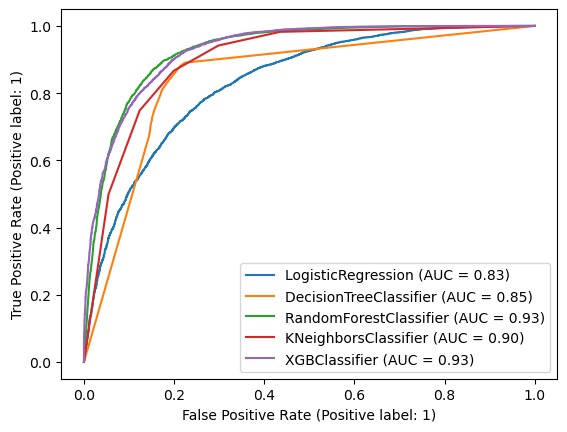

In [89]:
#Lets plot roc curve and check auc and performance of all algorithms

from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(LR, xtest, ytest)
plot_roc_curve(dt, xtest, ytest, ax = disp.ax_)
plot_roc_curve(rfc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(knc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(xgb, xtest, ytest, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')

plt.show()

# Hyperparameter Tuning

In [90]:
param_grid = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [91]:
GCV =  GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)

In [92]:
GCV.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [93]:
GCV.best_params_  

{'criterion': 'entropy',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'n_estimators': 700}

In [94]:
model = RandomForestClassifier(criterion = 'entropy', max_depth=22, min_samples_leaf = 1, n_estimators=700)

In [95]:
model.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [97]:
print(f"Accuracy Score: {accuracy_score(ytest,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred)}")
print("---------------------------------------------------")

Accuracy Score: 86.31218557853549%
---------------------------------------------------
roc_auc_score: 85.87024278702165%
---------------------------------------------------
Confusion Matrix : 
 [[5816 1292]
 [ 667 6537]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      7108
           1       0.83      0.91      0.87      7204

    accuracy                           0.86     14312
   macro avg       0.87      0.86      0.86     14312
weighted avg       0.87      0.86      0.86     14312

---------------------------------------------------


<b>After Hyperparameter Tuning, we got an accuracy score of 86.31%.</b>

# ROC curve for final model

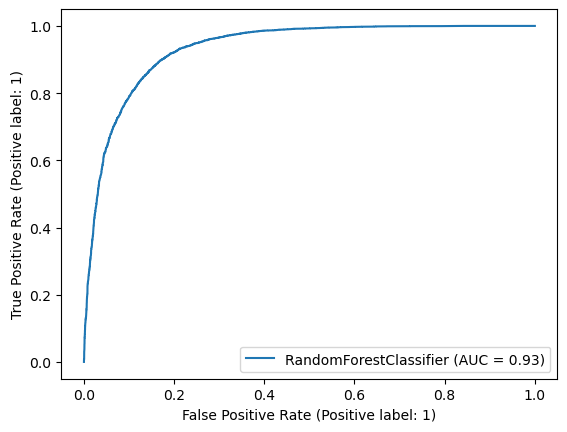

In [98]:
#Lets check our model performance after hyperparameter tuning

plot_roc_curve(model, xtest, ytest)
plt.show()

<b>Note that, we have improved the model's accuracy score as well as performance (AUC) by adjusting the hyperparameters.</b>

# Saving the model

In [99]:
import joblib
joblib.dump(model,"Census_Income_prediction.pkl")

['Census_Income_prediction.pkl']

# Loading the model

In [100]:
Model = joblib.load("Census_Income_prediction.pkl")
a = np.array(ytest)
prediction = Model.predict(xtest)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
14307,0,1
14308,1,0
14309,0,0
14310,0,0


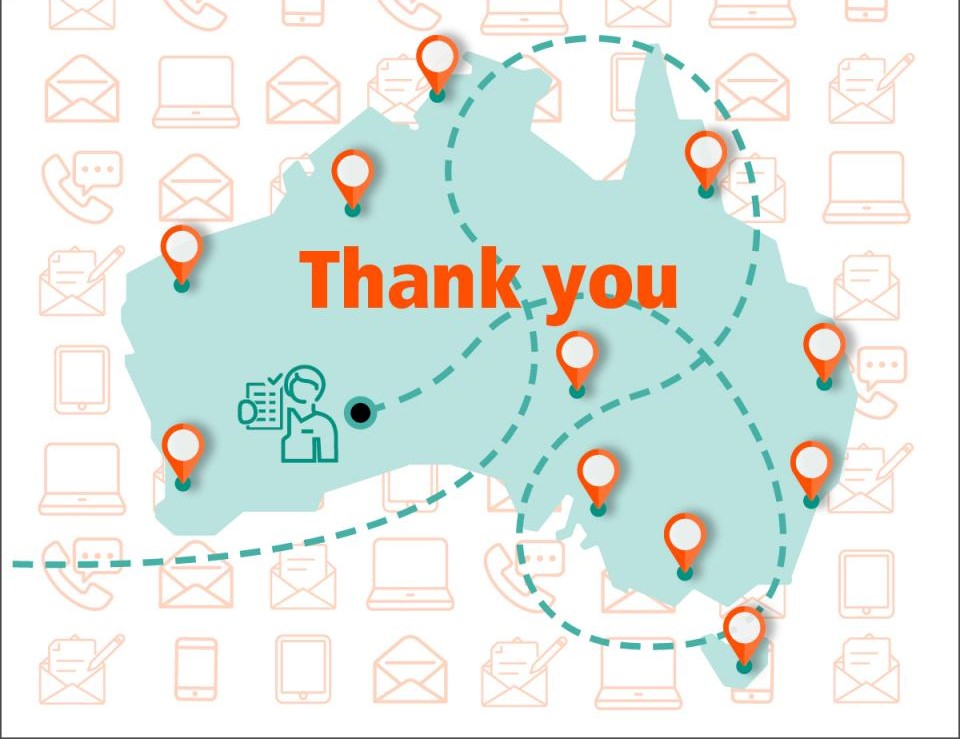